In [1]:
from sklearn.cluster import KMeans

In [2]:
from numpy import array

In [3]:
x = array([1, 2, 3, 4, 5, 6])
x

array([1, 2, 3, 4, 5, 6])

In [4]:
x = x.reshape(-1,1)
x

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [5]:
model = KMeans(n_clusters=2)

In [6]:
model.fit(x)

KMeans(n_clusters=2)

In [7]:
labels = model.predict(x)
labels

array([0, 0, 0, 1, 1, 1], dtype=int32)

In [8]:
import matplotlib.pyplot as plt

In [9]:
y = array([3, 7, 3, 7, 3, 7])
y = y.reshape(-1, 1)
y

array([[3],
       [7],
       [3],
       [7],
       [3],
       [7]])

In [10]:
from numpy import hstack

In [11]:
points = hstack((x,y))
points

array([[1, 3],
       [2, 7],
       [3, 3],
       [4, 7],
       [5, 3],
       [6, 7]])

In [12]:
model = KMeans(n_clusters=2)

In [13]:
model.fit(points)

KMeans(n_clusters=2)

In [14]:
labels = model.predict(points)
labels

array([0, 1, 0, 1, 0, 1], dtype=int32)

In [15]:
labels = labels.reshape(-1,1)
labels

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1]], dtype=int32)

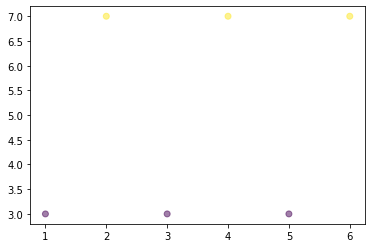

In [16]:
plt.scatter(x, y, c=labels, alpha=0.5)

In [17]:
centroids = model.cluster_centers_
centroids

array([[3., 3.],
       [4., 7.]])

In [18]:
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

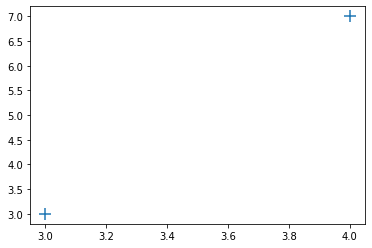

In [19]:
plt.scatter(centroids_x, centroids_y, marker='+', s=150)

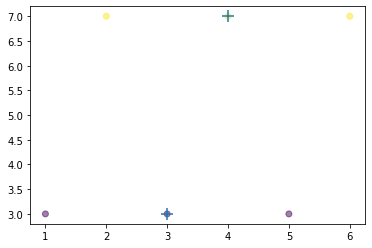

In [20]:
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids_x, centroids_y, marker='+', s=150)

In [21]:
z = array(x, copy=True)

In [22]:
z

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [23]:
points3D = hstack((points, z))
points3D

array([[1, 3, 1],
       [2, 7, 2],
       [3, 3, 3],
       [4, 7, 4],
       [5, 3, 5],
       [6, 7, 6]])

In [24]:
model = KMeans(n_clusters=2)

In [25]:
model.fit(points3D)

KMeans(n_clusters=2)

In [26]:
labels = model.predict(points3D)
labels

array([1, 0, 1, 0, 1, 0], dtype=int32)

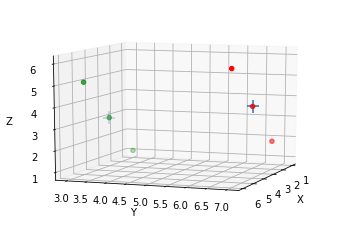

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

color = ['red' if l == 0 else 'green' for l in labels]

ax.scatter(x, y, z, c=color, marker = 'o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

centroids = model.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids_z = centroids[:,2]

ax.scatter(centroids_x, centroids_y, centroids_z, marker = '+', s=150)

ax.view_init(elev=10, azim=20)

In [28]:
ks = range(1,7)
inertias = []

In [29]:
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(points3D)
    inertias.append(model.inertia_)

In [30]:
inertias

[59.0, 29.333333333333336, 17.0, 8.0, 4.0, 0.0]

([<matplotlib.axis.XTick at 0x7f6f56240630>,
 <a list of 6 Text major ticklabel objects>)

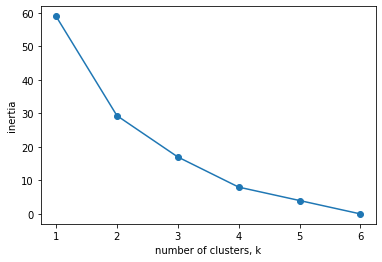

In [31]:
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)